In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Constants for the perceptron
LEARNING_RATE = 0.05  # Learning rate
MAX_EPOCHS = 1000  # Maximum number of epochs
CONVERGENCE_ERROR = 0.002  # Error threshold for convergence

In [51]:
def summation_unit(inputs, weights):
    """
    Summation unit to calculate the weighted sum of inputs.
    
    Parameters:
    - inputs: Input values (numpy array)
    - weights: Weights (numpy array)
    
    Returns:
    - Weighted sum (float)
    """
    return np.dot(inputs, weights)

In [52]:
def activation_step(weighted_sum):
    """
    Step activation function.
    
    Parameters:
    - weighted_sum: The weighted sum of inputs.
    
    Returns:
    - Activation output (0 or 1)
    """
    return 1 if weighted_sum > 0 else 0

In [53]:
def activation_bipolar_step(weighted_sum):
    """
    Bipolar step activation function.
    
    Parameters:
    - weighted_sum: The weighted sum of inputs.
    
    Returns:
    - Activation output (-1 or 1)
    """
    return 1 if weighted_sum > 0 else -1

In [54]:
def activation_sigmoid(weighted_sum):
    """
    Sigmoid activation function.
    
    Parameters:
    - weighted_sum: The weighted sum of inputs.
    
    Returns:
    - Activation output (float)
    """
    return 1 / (1 + np.exp(-weighted_sum))

def activation_tanh(weighted_sum):
    """
    Tanh activation function.
    
    Parameters:
    - weighted_sum: The weighted sum of inputs.
    
    Returns:
    - Activation output (float)
    """
    return np.tanh(weighted_sum)

In [55]:
def activation_relu(weighted_sum):
    """
    ReLU activation function.
    
    Parameters:
    - weighted_sum: The weighted sum of inputs.
    
    Returns:
    - Activation output (float)
    """
    return max(0, weighted_sum)

def activation_leaky_relu(weighted_sum, alpha=0.01):
    """
    Leaky ReLU activation function.
    
    Parameters:
    - weighted_sum: The weighted sum of inputs.
    - alpha: Slope for negative values.
    
    Returns:
    - Activation output (float)
    """
    return weighted_sum if weighted_sum > 0 else alpha * weighted_sum


In [56]:
def comparator_unit(y_true, y_pred):
    """
    Comparator unit to calculate the error.
    
    Parameters:
    - y_true: True labels (numpy array)
    - y_pred: Predicted labels (numpy array)
    
    Returns:
    - Sum-squared error (float)
    """
    return np.sum((y_true - y_pred) ** 2)

def train_perceptron(X, y, activation_function, initial_weights):
    """
    Train the perceptron using the specified activation function.
    
    Parameters:
    - X: Input data (numpy array)
    - y: Target labels (numpy array)
    - activation_function: Activation function to use
    - initial_weights: Initial weights (numpy array)
    
    Returns:
    - weights: Final weights after training (numpy array)
    - epoch_errors: List of errors at each epoch (list)
    - epochs: Number of epochs taken to converge (int)
    """
    weights = initial_weights.copy()  # Initialize weights
    epoch_errors = []  # List to store errors
    for epoch in range(MAX_EPOCHS):
        total_error = 0  # Initialize total error for this epoch
        for inputs, target in zip(X, y):
            weighted_sum = summation_unit(inputs, weights)
            if activation_function == 'step':
                prediction = activation_step(weighted_sum)
            elif activation_function == 'bipolar_step':
                prediction = activation_bipolar_step(weighted_sum)
            elif activation_function == 'sigmoid':
                prediction = activation_sigmoid(weighted_sum)
            elif activation_function == 'tanh':
                prediction = activation_tanh(weighted_sum)
            elif activation_function == 'relu':
                prediction = activation_relu(weighted_sum)
            elif activation_function == 'leaky_relu':
                prediction = activation_leaky_relu(weighted_sum)
            else:
                raise ValueError("Invalid activation function specified.")

            # Update weights based on prediction error
            error = target - prediction
            total_error += error ** 2
            weights += LEARNING_RATE * error * inputs  # Update weights

        # Calculate sum-squared error for the epoch
        epoch_errors.append(total_error)
        if total_error <= CONVERGENCE_ERROR:
            break  # Stop if convergence is achieved

    return weights, epoch_errors, epoch + 1  # Return final weights, errors, and epochs

In [57]:
def plot_errors(epoch_errors, activation_function):
    """
    Plot the errors over epochs.
    
    Parameters:
    - epoch_errors: List of errors at each epoch (list)
    - activation_function: Activation function used (str)
    
    Returns:
    - None
    """
    plt.plot(epoch_errors)
    plt.title(f'Error vs Epochs - {activation_function.capitalize()} Activation')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.grid()
    plt.show()

Activation: step, Final Weights: [ 5.35  0.2  -5.4 ], Epochs: 94


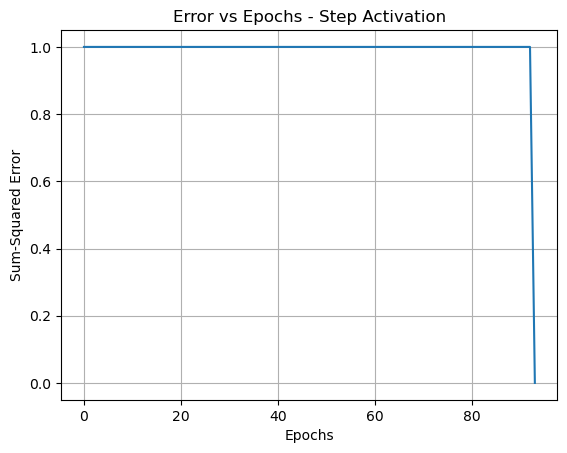

Activation: bipolar_step, Final Weights: [ 0.2   0.1  -0.15], Epochs: 1000


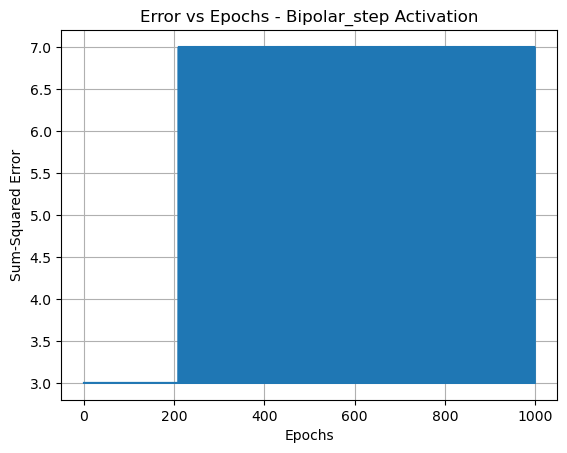

Activation: sigmoid, Final Weights: [ 5.3005861   5.08352114 -7.96717859], Epochs: 1000


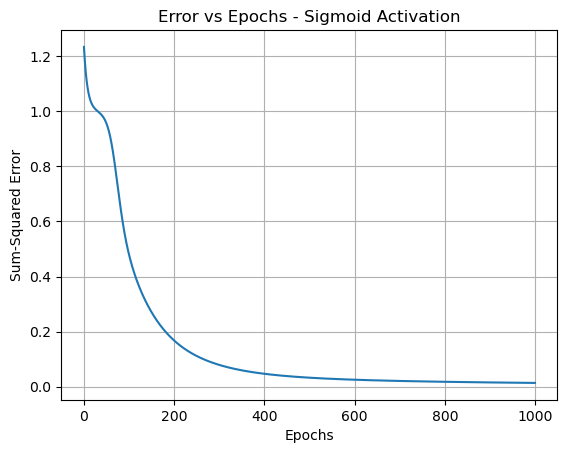

Activation: tanh, Final Weights: [ 0.61849249  0.60350493 -0.30924625], Epochs: 1000


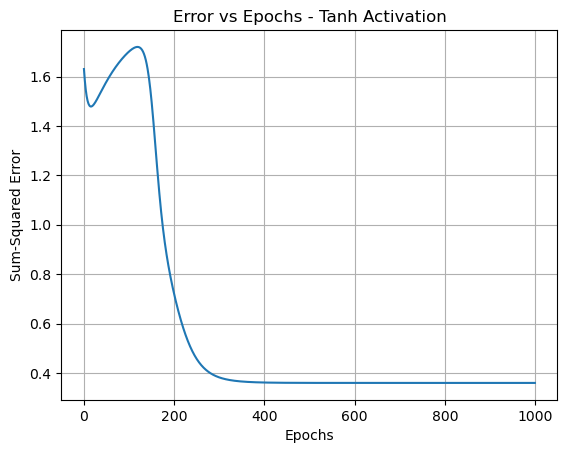

Activation: relu, Final Weights: [ 5.39229588  0.94224782 -5.35770412], Epochs: 167


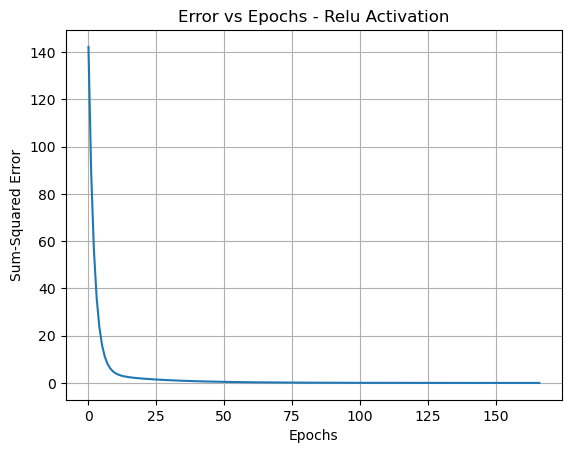

Activation: leaky_relu, Final Weights: [ 3.46232448  1.01913152 -3.46046735], Epochs: 1000


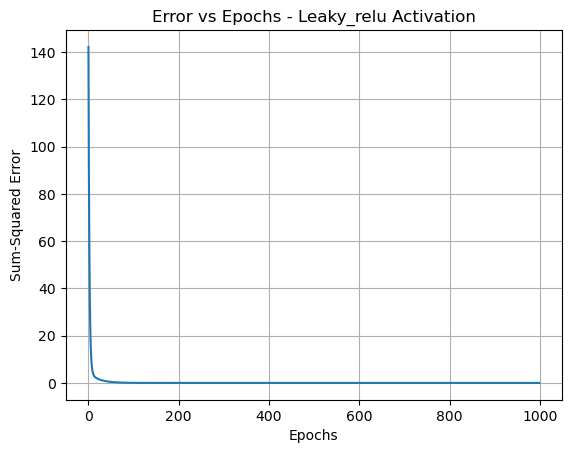

In [58]:
# Define initial weights
initial_weights = np.array([10, 0.2, -0.75])  # W0, W1, W2

# Define training data for AND gate
X_and = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])  # Inputs (including bias)
y_and = np.array([0, 0, 0, 1])  # Outputs

# Train perceptron for AND gate with different activation functions
activation_functions = ['step', 'bipolar_step', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
for activation in activation_functions:
    final_weights, epoch_errors, epochs = train_perceptron(X_and, y_and, activation, initial_weights)
    print(f'Activation: {activation}, Final Weights: {final_weights}, Epochs: {epochs}')
    plot_errors(epoch_errors, activation)

Activation: step, Final Weights: [-7.64666108e-15  1.38777878e-17  9.71445147e-17], Epochs: 1000


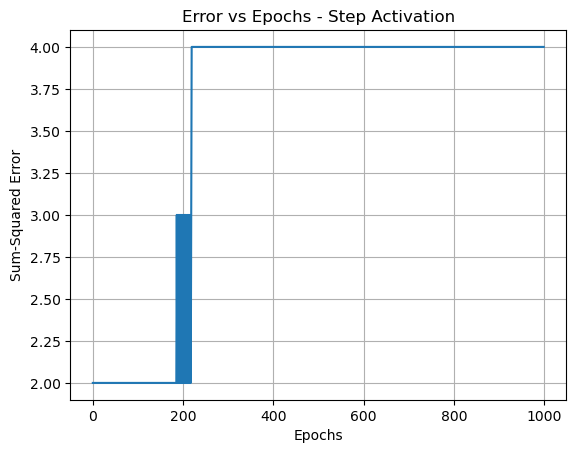

Activation: bipolar_step, Final Weights: [-7.64666108e-15  2.35922393e-16  5.00000000e-02], Epochs: 1000


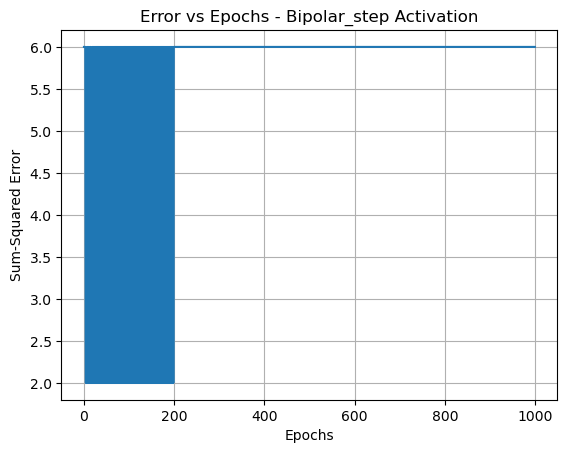

Activation: sigmoid, Final Weights: [-0.0484434  -0.02320303  0.02272497], Epochs: 1000


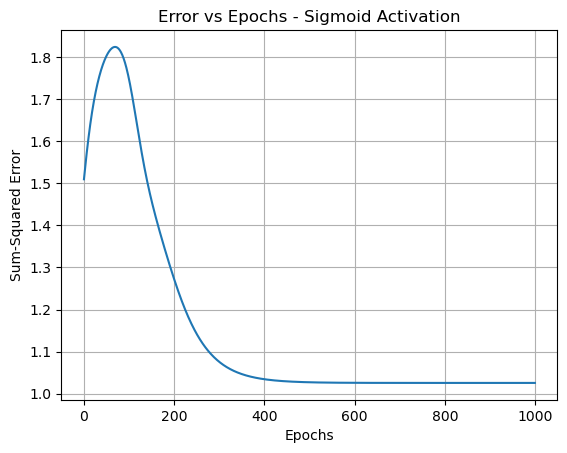

Activation: tanh, Final Weights: [-0.05194725 -0.02597363  0.5756171 ], Epochs: 1000


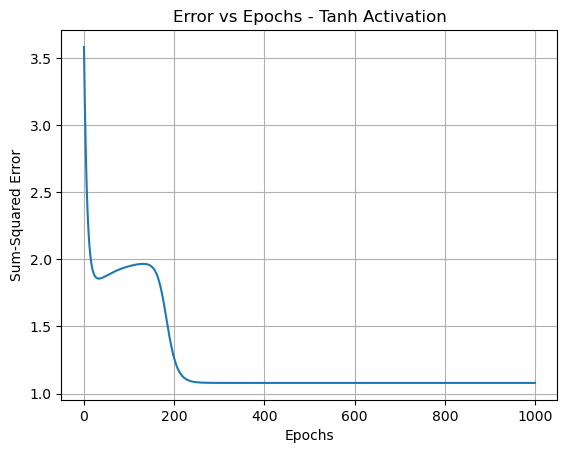

Activation: relu, Final Weights: [-0.05263158 -0.02631579  0.52631579], Epochs: 1000


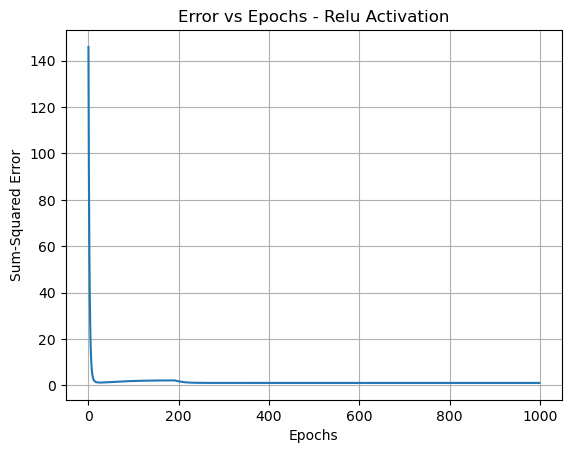

Activation: leaky_relu, Final Weights: [-0.05263158 -0.02631579  0.52631579], Epochs: 1000


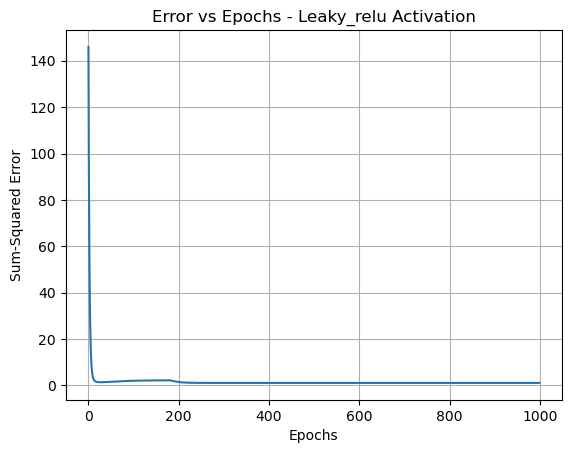

In [59]:
# Define training data for XOR gate
X_xor = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])  # Inputs (including bias)
y_xor = np.array([0, 1, 1, 0])  # Outputs

# Train perceptron for XOR gate with different activation functions
for activation in activation_functions:
    final_weights, epoch_errors, epochs = train_perceptron(X_xor, y_xor, activation, initial_weights)
    print(f'Activation: {activation}, Final Weights: {final_weights}, Epochs: {epochs}')
    plot_errors(epoch_errors, activation)

In [72]:
def sigmoid(x):
    """
    Sigmoid activation function.
    
    Parameters:
    - x: Input value (float or numpy array)
    
    Returns:
    - Sigmoid output (float or numpy array)
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of the sigmoid function.
    
    Parameters:
    - x: Input value (float or numpy array)
    
    Returns:
    - Derivative output (float or numpy array)
    """
    return x * (1 - x)


In [74]:
def train_perceptron(X, y, initial_weights):
    """
    Train the perceptron using the sigmoid activation function.
    
    Parameters:
    - X: Input data (numpy array)
    - y: Target labels (numpy array)
    - initial_weights: Initial weights (numpy array)
    
    Returns:
    - weights: Final weights after training (numpy array)
    - epoch_errors: List of errors at each epoch (list)
    - epochs: Number of epochs taken to converge (int)
    """
    weights = initial_weights.copy()  # Initialize weights
    epoch_errors = []  # List to store errors
    for epoch in range(MAX_EPOCHS):
        total_error = 0  # Initialize total error for this epoch
        for inputs, target in zip(X, y):
            weighted_sum = summation_unit(inputs, weights)
            prediction = sigmoid(weighted_sum)
            
            # Calculate error
            error = target - prediction
            total_error += error ** 2
            
            # Update weights
            weights += LEARNING_RATE * error * sigmoid_derivative(prediction) * inputs

        # Calculate average error for the epoch
        epoch_errors.append(total_error / len(y))
        if total_error / len(y) <= CONVERGENCE_ERROR:
            break  # Stop if convergence is achieved

    return weights, epoch_errors, epoch + 1  # Return final weights, errors, and epochs

In [76]:
def plot_errors(epoch_errors):
    """
    Plot the errors over epochs.
    
    Parameters:
    - epoch_errors: List of errors at each epoch (list)
    
    Returns:
    - None
    """
    plt.plot(epoch_errors)
    plt.title('Error vs Epochs - Sigmoid Activation')
    plt.xlabel('Epochs')
    plt.ylabel('Average Error')
    plt.grid()
    plt.show()

Final Weights: [0.70234689 0.57858108 0.80376369 0.92350551]
Epochs: 1000


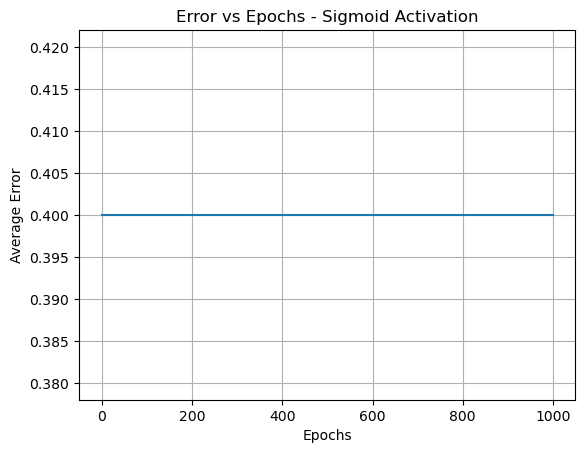

In [78]:
# Customer data
# Candies, Mangoes, Milk Packets, Payment, High Value Transaction (1 for Yes, 0 for No)
data = np.array([
    [20, 6, 2, 386, 1],  # C_1
    [16, 3, 6, 289, 1],  # C_2
    [27, 6, 2, 393, 1],  # C_3
    [19, 1, 2, 110, 0],  # C_4
    [24, 4, 2, 280, 1],  # C_5
    [22, 1, 5, 167, 0],  # C_6
    [15, 4, 2, 271, 1],  # C_7
    [18, 4, 2, 274, 1],  # C_8
    [21, 1, 4, 148, 0],  # C_9
    [16, 2, 4, 198, 0]   # C_10
])

# Split data into inputs and outputs
X = data[:, :-1]  # Features (Candies, Mangoes, Milk Packets, Payment)
y = data[:, -1]   # Target (High Value Transaction)

# Initialize weights (including bias)
initial_weights = np.random.rand(X.shape[1])  # Random initialization of weights

# Train the perceptron
final_weights, epoch_errors, epochs = train_perceptron(X, y, initial_weights)

# Print final weights and epochs
print(f'Final Weights: {final_weights}')
print(f'Epochs: {epochs}')

# Plot the error over epochs
plot_errors(epoch_errors)

In [80]:
# Customer data
data = np.array([
    [20, 6, 2, 386, 1],  # C_1
    [16, 3, 6, 289, 1],  # C_2
    [27, 6, 2, 393, 1],  # C_3
    [19, 1, 2, 110, 0],  # C_4
    [24, 4, 2, 280, 1],  # C_5
    [22, 1, 5, 167, 0],  # C_6
    [15, 4, 2, 271, 1],  # C_7
    [18, 4, 2, 274, 1],  # C_8
    [21, 1, 4, 148, 0],  # C_9
    [16, 2, 4, 198, 0]   # C_10
])

# Split data into inputs and outputs
X = data[:, :-1]  # Features (Candies, Mangoes, Milk Packets, Payment)
y = data[:, -1]   # Target (High Value Transaction)

# Perceptron Learning
initial_weights = np.random.rand(X.shape[1])
learning_rate = 0.1
max_epochs = 1000
convergence_error = 0.002

weights = initial_weights.copy()
for epoch in range(max_epochs):
    total_error = 0
    for inputs, target in zip(X, y):
        prediction = 1 if np.dot(inputs, weights) > 0 else 0
        error = target - prediction
        total_error += error ** 2
        weights += learning_rate * error * inputs
    if total_error / len(y) <= convergence_error:
        break

print("Perceptron Learning:")
print(f"Final Weights: {weights}")
print(f"Epochs: {epoch + 1}")

# Matrix Pseudo-Inverse
X_augmented = np.c_[np.ones(len(X)), X]
weights_pinv = np.linalg.pinv(X_augmented) @ y

print("\nMatrix Pseudo-Inverse:")
print(f"Weights: {weights_pinv}")

Perceptron Learning:
Final Weights: [-576.60649346   93.43300105 -249.07986602   50.60478344]
Epochs: 716

Matrix Pseudo-Inverse:
Weights: [ 0.1139903  -0.02789923  0.01473739 -0.04323249  0.00447248]


Final Weights: [ 0.02885709  0.00476494 -0.02485486]
Epochs: 1000


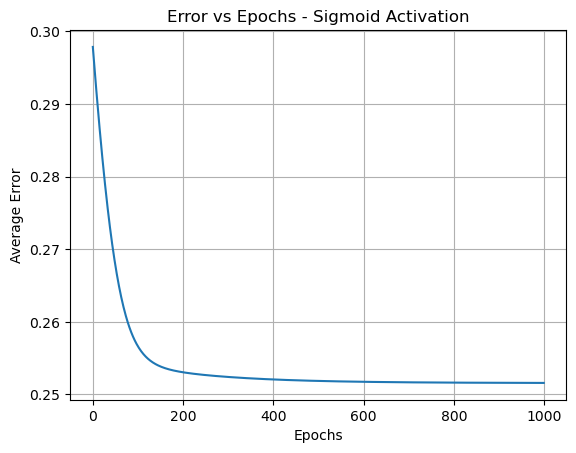

In [82]:
# Define training data for XOR gate
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])  # Inputs (including bias)
y = np.array([0, 1, 1, 0])  # Outputs

# Initialize weights (including bias)
initial_weights = np.random.rand(X.shape[1])  # Random initialization of weights

# Train the perceptron
final_weights, epoch_errors, epochs = train_perceptron(X, y, initial_weights)

# Print results
print(f'Final Weights: {final_weights}')
print(f'Epochs: {epochs}')

# Plot the error over epochs
plot_errors(epoch_errors)

In [84]:
def train_neural_network(X, y, hidden_neurons):
    """Train the neural network using backpropagation."""
    # Initialize weights randomly
    weights_ih = np.random.rand(X.shape[1], hidden_neurons)  # Input to Hidden Layer
    weights_ho = np.random.rand(hidden_neurons, y.shape[1])  # Hidden to Output Layer
    
    epoch_errors = []
    for epoch in range(MAX_EPOCHS):
        total_error = 0
        
        # Forward propagation
        hidden_inputs = np.dot(X, weights_ih)
        hidden_outputs = sigmoid(hidden_inputs)
        output_inputs = np.dot(hidden_outputs, weights_ho)
        output = sigmoid(output_inputs)
        
        # Calculate error
        error = y - output
        total_error += np.sum(error ** 2)
        
        # Backpropagation
        delta_output = error * sigmoid_derivative(output)
        delta_hidden = np.dot(delta_output, weights_ho.T) * sigmoid_derivative(hidden_outputs)
        
        # Update weights
        weights_ho += LEARNING_RATE * np.dot(hidden_outputs.T, delta_output)
        weights_ih += LEARNING_RATE * np.dot(X.T, delta_hidden)
        
        epoch_errors.append(total_error / len(y))
        if total_error / len(y) <= CONVERGENCE_ERROR:
            break
    
    return weights_ih, weights_ho, epoch_errors, epoch + 1

Weights (Input to Hidden): [[ 0.41699079 -1.34270269]
 [ 0.08260165 -1.19541632]
 [ 0.98946233  0.90802427]]
Weights (Hidden to Output): [[ 0.31020561 -0.39796437]
 [ 1.86827605 -1.72564876]]
Epochs: 1000


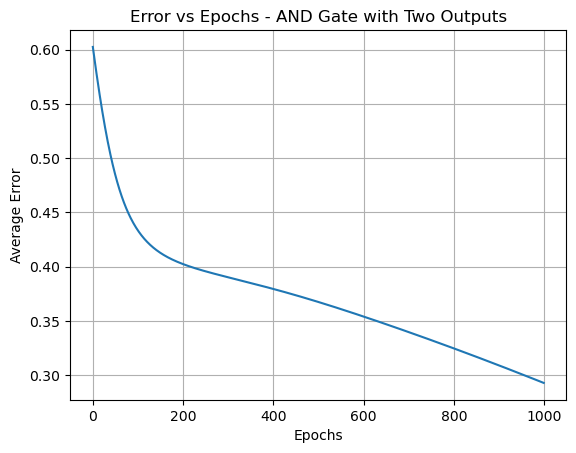

In [86]:
# Define training data for AND gate with two output nodes
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])  # Inputs (including bias)
y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # Outputs for AND gate

# Train the neural network
weights_ih, weights_ho, epoch_errors, epochs = train_neural_network(X, y, hidden_neurons=2)

# Print results
print(f"Weights (Input to Hidden): {weights_ih}")
print(f"Weights (Hidden to Output): {weights_ho}")
print(f"Epochs: {epochs}")

# Plot the error over epochs
plt.plot(epoch_errors)
plt.title('Error vs Epochs - AND Gate with Two Outputs')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.grid()
plt.show()

In [88]:
import numpy as np
from sklearn.neural_network import MLPClassifier

# Define training data for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y_and = np.array([0, 0, 0, 1])  # Outputs

# Create MLPClassifier instance
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=42)

# Train the model
mlp_and.fit(X_and, y_and)

# Evaluate the model
print("AND Gate Results:")
print("Weights (Input to Hidden):", mlp_and.coefs_[0])  # Weights from input to hidden layer
print("Weights (Hidden to Output):", mlp_and.coefs_[1])  # Weights from hidden to output layer
print("Predictions:", mlp_and.predict(X_and))

AND Gate Results:
Weights (Input to Hidden): [[-1.30648632  1.40023777]
 [-0.78118408  1.09684355]]
Weights (Hidden to Output): [[-1.58331314]
 [ 0.37931475]]
Predictions: [0 0 0 0]


C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
# Define training data for XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y_xor = np.array([0, 1, 1, 0])  # Outputs

# Create MLPClassifier instance
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=42)

# Train the model
mlp_xor.fit(X_xor, y_xor)

# Evaluate the model
print("\nXOR Gate Results:")
print("Weights (Input to Hidden):", mlp_xor.coefs_[0])  # Weights from input to hidden layer
print("Weights (Hidden to Output):", mlp_xor.coefs_[1])  # Weights from hidden to output layer
print("Predictions:", mlp_xor.predict(X_xor))


XOR Gate Results:
Weights (Input to Hidden): [[-0.16251362  0.62255882]
 [ 0.3428559   0.12469425]]
Weights (Hidden to Output): [[-0.73646257]
 [ 0.58315243]]
Predictions: [1 1 1 1]


In [92]:
# Customer data
data = np.array([
    [20, 6, 2, 386, 1],  # C_1
    [16, 3, 6, 289, 1],  # C_2
    [27, 6, 2, 393, 1],  # C_3
    [19, 1, 2, 110, 0],  # C_4
    [24, 4, 2, 280, 1],  # C_5
    [22, 1, 5, 167, 0],  # C_6
    [15, 4, 2, 271, 1],  # C_7
    [18, 4, 2, 274, 1],  # C_8
    [21, 1, 4, 148, 0],  # C_9
    [16, 2, 4, 198, 0]   # C_10
])

# Split data into inputs and outputs
X_custom = data[:, :-1]  # Features (Candies, Mangoes, Milk Packets, Payment)
y_custom = data[:, -1]   # Target (High Value Transaction)

# Create MLPClassifier instance
mlp_custom = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', max_iter=1000, random_state=42)

# Train the model
mlp_custom.fit(X_custom, y_custom)

# Evaluate the model
print("\nCustom Dataset Results:")
print("Weights (Input to Hidden):", mlp_custom.coefs_[0])  # Weights from input to hidden layer
print("Weights (Hidden to Output):", mlp_custom.coefs_[1])  # Weights from hidden to output layer
print("Predictions:", mlp_custom.predict(X_custom))


Custom Dataset Results:
Weights (Input to Hidden): [[-0.08259503  0.44516891  0.1721066   0.06992197 -0.28590666]
 [-0.28592931 -0.37383746  0.34390547  0.07058371  0.15879917]
 [-0.41314655  0.42485166  0.26696345 -0.28930707 -0.26170464]
 [-0.26022397 -0.13774912  0.00056642 -0.08707856 -0.15944863]]
Weights (Hidden to Output): [[ 0.2908668 ]
 [-0.33812299]
 [ 0.05508142]
 [ 0.08255942]
 [-0.48470667]]
Predictions: [1 1 1 1 1 1 1 1 1 1]
